## Machine Learning

Machine learning is a type of artificial intelligence (AI) that provides computers with the ability to <u>learn without being explicitly programmed</u>. Machine learning focuses on the development of computer programs that can change when exposed to new data.

Machine learning tasks are broadly classified into three main categories:
1. <b>Supervised Learning</b>
2. Unsupervised Learning
3. Reinforcement Learning

## How do we learn?

In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Math, Latex, Image
%matplotlib inline

## What we know?

In [2]:
df_1 = pd.DataFrame({"input_x1" : [1,2,7,100], "input_x2" : [1,3,2,1], "output_y" : [3,8,11,102]})
display(HTML(df_1.to_html(index=False)))

input_x1,input_x2,output_y
1,1,3
2,3,8
7,2,11
100,1,102


## What we want to know?

In [3]:
df_2 = pd.DataFrame({"input_x1" : [5,3], "input_x2" : [5,1], "output_y" : ["?","?"]})
display(HTML(df_2.to_html(index=False)))

input_x1,input_x2,output_y
5,5,?
3,1,?


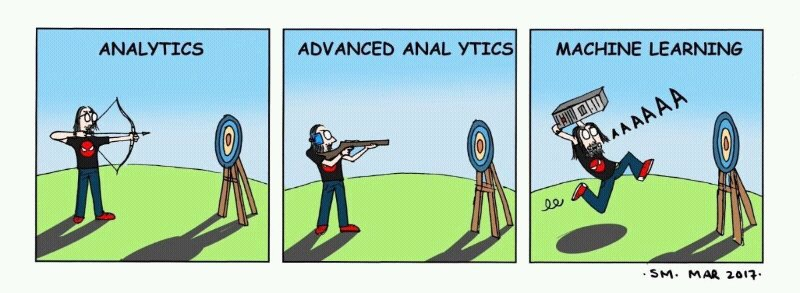

In [4]:
Image(filename='data/images/comic.jpg')

In [5]:
display(Math(r'y = F(x_1,x_2) = x_1 + 2x_2'))

<IPython.core.display.Math object>

### In the real world, the mappings from input to output isn't very simple

In [6]:
df_3 = pd.DataFrame({'x1_pol_no': [1,2,3], 'x2_age' : [50,55,60], 'x3_account_value' : ["100K", "500K", "250K"], 'x4_no_of_customer_care_calls' : [0, 2, 3], 'x5_agent_surrender_rate' : ["10%", "1%", "5%"], 'y_surrender' : [1,0,1]})
display(HTML(df_3.to_html(index=False)))

x1_pol_no,x2_age,x3_account_value,x4_no_of_customer_care_calls,x5_agent_surrender_rate,y_surrender
1,50,100K,0,10%,1
2,55,500K,2,1%,0
3,60,250K,3,5%,1


In [7]:
display(Math(r'y = F(x_1,x_2,x_3,x_4,x_5) = ?'))

<IPython.core.display.Math object>

### What's wrong above?

We can use many supervised machine learning algorithms to learn F(X) such as:

1. Linear Regression
2. Logistic Regression
3. Random Forests
4. Artifical Neural Networks

## Simple Neural Network

Input Layer - Yellow | Hidden Layer - Green | Output Layer - Orange

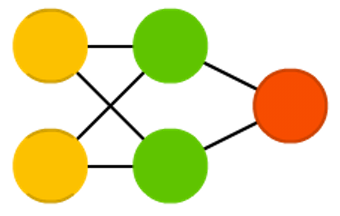

In [27]:
Image(filename='data/images/mlp.png') 

What happens at a single node?

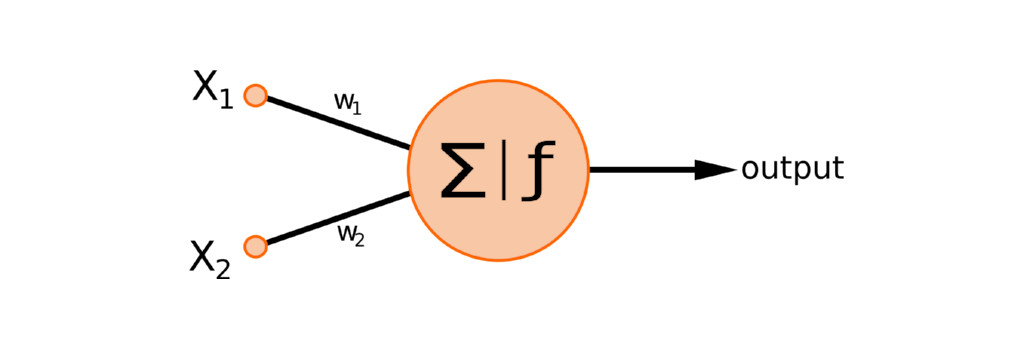

In [4]:
Image(filename='data/images/perceptron.jpg')

In [24]:
display(Math(r'y = F(x_1,x_2) = max(w_1max(w_2x_1 + w_3x_2 + b_1,0) + w_4max(w_5x_1 + w_6x_2+ b_2) + b_3,0)')) 

<IPython.core.display.Math object>

In [10]:
display(Math(r'loss = (y_{actual} - y_{pred})^2')) 

<IPython.core.display.Math object>

### We know x, we learn the w & b from the data

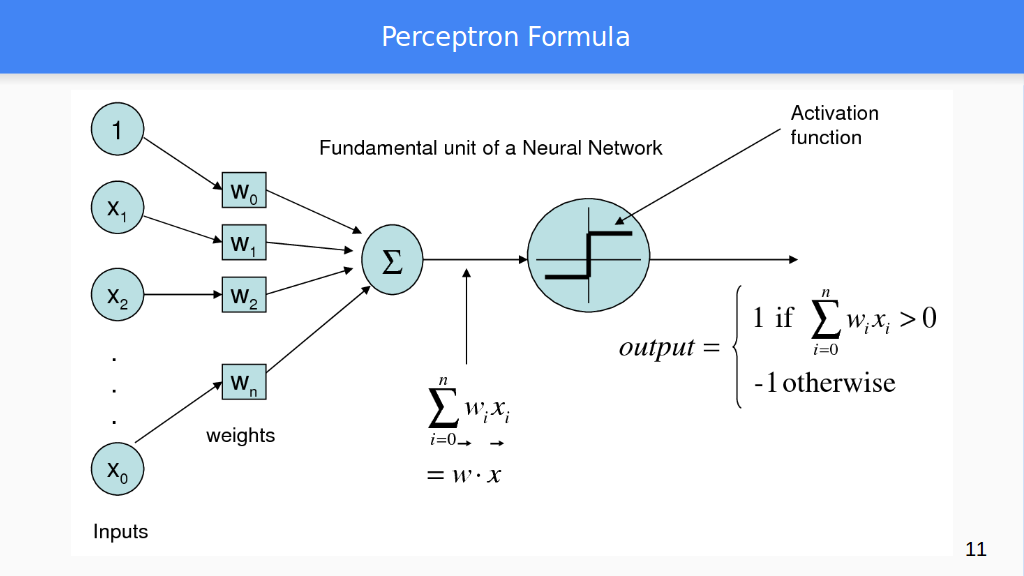

In [12]:
Image(filename='data/images/perceptron_formula.png')

## Creating Data

In [13]:
function = lambda x : x[0] + 2*x[1]

In [14]:
X_data = np.random.uniform(0,100,(1000,2))
Y_data = np.array([np.apply_along_axis(function, 1, X_data)]).T

In [15]:
X_data[0:5]

array([[  1.621198  ,  18.86911552],
       [ 94.17496266,   5.03893721],
       [ 98.18214218,  69.38665284],
       [ 51.63659358,  14.18164784],
       [ 94.70317314,  52.41609011]])

In [16]:
Y_data[0:5]

array([[  39.35942904],
       [ 104.25283709],
       [ 236.95544786],
       [  79.99988927],
       [ 199.53535335]])

## Defining Graph

In [17]:
X = tf.placeholder(tf.float32, [None, 2], name="X")
Y = tf.placeholder(tf.float32, [None, 1], name="Y")

In [18]:
w_1 = tf.Variable(tf.random_normal([2,2], stddev=0.001))
b_1 = tf.Variable(tf.random_normal([2], stddev=0.001))
w_2 = tf.Variable(tf.random_normal([2,1], stddev=0.001))
b_2 = tf.Variable(tf.random_normal([1], stddev=0.001))

In [19]:
h = tf.nn.relu(tf.add(tf.matmul(X, w_1),b_1)) 
y_pred = tf.nn.relu(tf.add(tf.matmul(h, w_2),b_2))
cost = tf.nn.l2_loss(y_pred - Y)
updates = tf.train.AdamOptimizer().minimize(cost)

In [20]:
saver = tf.train.Saver()

## Training Model

In [21]:
batch_size = 32
n_epochs = 450
epoch_loss_list = []
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for epoch in range(n_epochs):
        epoch_loss = 0
        num_batch = int(len(X_data)/batch_size)
        for i in range(num_batch):
            start_index = i*num_batch
            end_index = (i+1)*num_batch 
            _, c = sess.run([updates,cost], feed_dict={X: X_data[start_index:end_index], Y: Y_data[start_index:end_index]})
            epoch_loss +=c
        epoch_loss_list.append(epoch_loss)

    saver.save(sess, 'trained-models/simple_ufa_model')

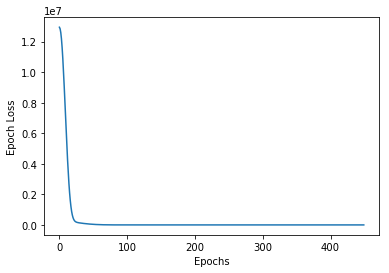

In [22]:
plt.plot(range(n_epochs), epoch_loss_list)
plt.ylabel("Epoch Loss")
plt.xlabel("Epochs")

## Making Predictions

In [59]:
sess = tf.Session()
saver = tf.train.import_meta_graph('trained-models/simple_ufa_model.meta')
saver.restore(sess, 'trained-models/simple_ufa_model')

INFO:tensorflow:Restoring parameters from trained-models/simple_ufa_model


In [60]:
sess.run(y_pred, feed_dict = {X : [[1,1],[2,2],[3,3],[100,100],[1000,1],[1,1000]]})

array([[    3.00000358],
       [    6.00000334],
       [    9.00000381],
       [  300.00003052],
       [ 1001.99981689],
       [ 2001.00024414]], dtype=float32)

In [62]:
sess.run(y_pred, feed_dict = {X : [[7,5]]}) 

array([[ 17.00000191]], dtype=float32)

## Parameters Value

In [63]:
W_1 = sess.run(w_1)
B_1 = sess.run(b_1)
W_2 = sess.run(w_2)
B_2 = sess.run(b_2)

In [64]:
W_1

array([[ 0.55306214,  0.55443615],
       [ 1.10856426,  1.10643256]], dtype=float32)

In [65]:
B_1

array([-0.05710346, -0.05471963], dtype=float32)

In [66]:
W_2

array([[ 0.90299112],
       [ 0.90288061]], dtype=float32)

In [67]:
B_2

array([ 0.10097285], dtype=float32)

In [68]:
display(Math(r'y = F(x_1,x_2) = x_1 + 2x_2'))

<IPython.core.display.Math object>

In [69]:
print ("y = F(x1,x2) = max({0}*max({1}*x1 + {2}*x2 + {3},0) + {4}*max({5}*x1 + {6}*x2 + {7},0) + {8}),0)".format(W_2[0][0], W_1[0][0], W_1[1][0], B_1[0], W_2[1][0], W_1[0][1], W_1[1][1], B_1[1], B_2[0])) 

y = F(x1,x2) = max(0.9029911160469055*max(0.5530621409416199*x1 + 1.1085642576217651*x2 + -0.05710345879197121,0) + 0.9028806090354919*max(0.5544361472129822*x1 + 1.106432557106018*x2 + -0.054719630628824234,0) + 0.10097284615039825),0)


In [70]:
def new_function(x1,x2):
    a1 = max((W_1[0][0]*x1 + W_1[1][0]*x2 + B_1[0]),0)
    a2 = max((W_1[0][1]*x1 + W_1[1][1]*x2 + B_1[1]),0)
    print (max((W_2[0]*a1 + W_2[1]*a2 + B_2),0))

In [71]:
new_function(1,15)

[ 31.00000572]


## Different Neural Network Architectures

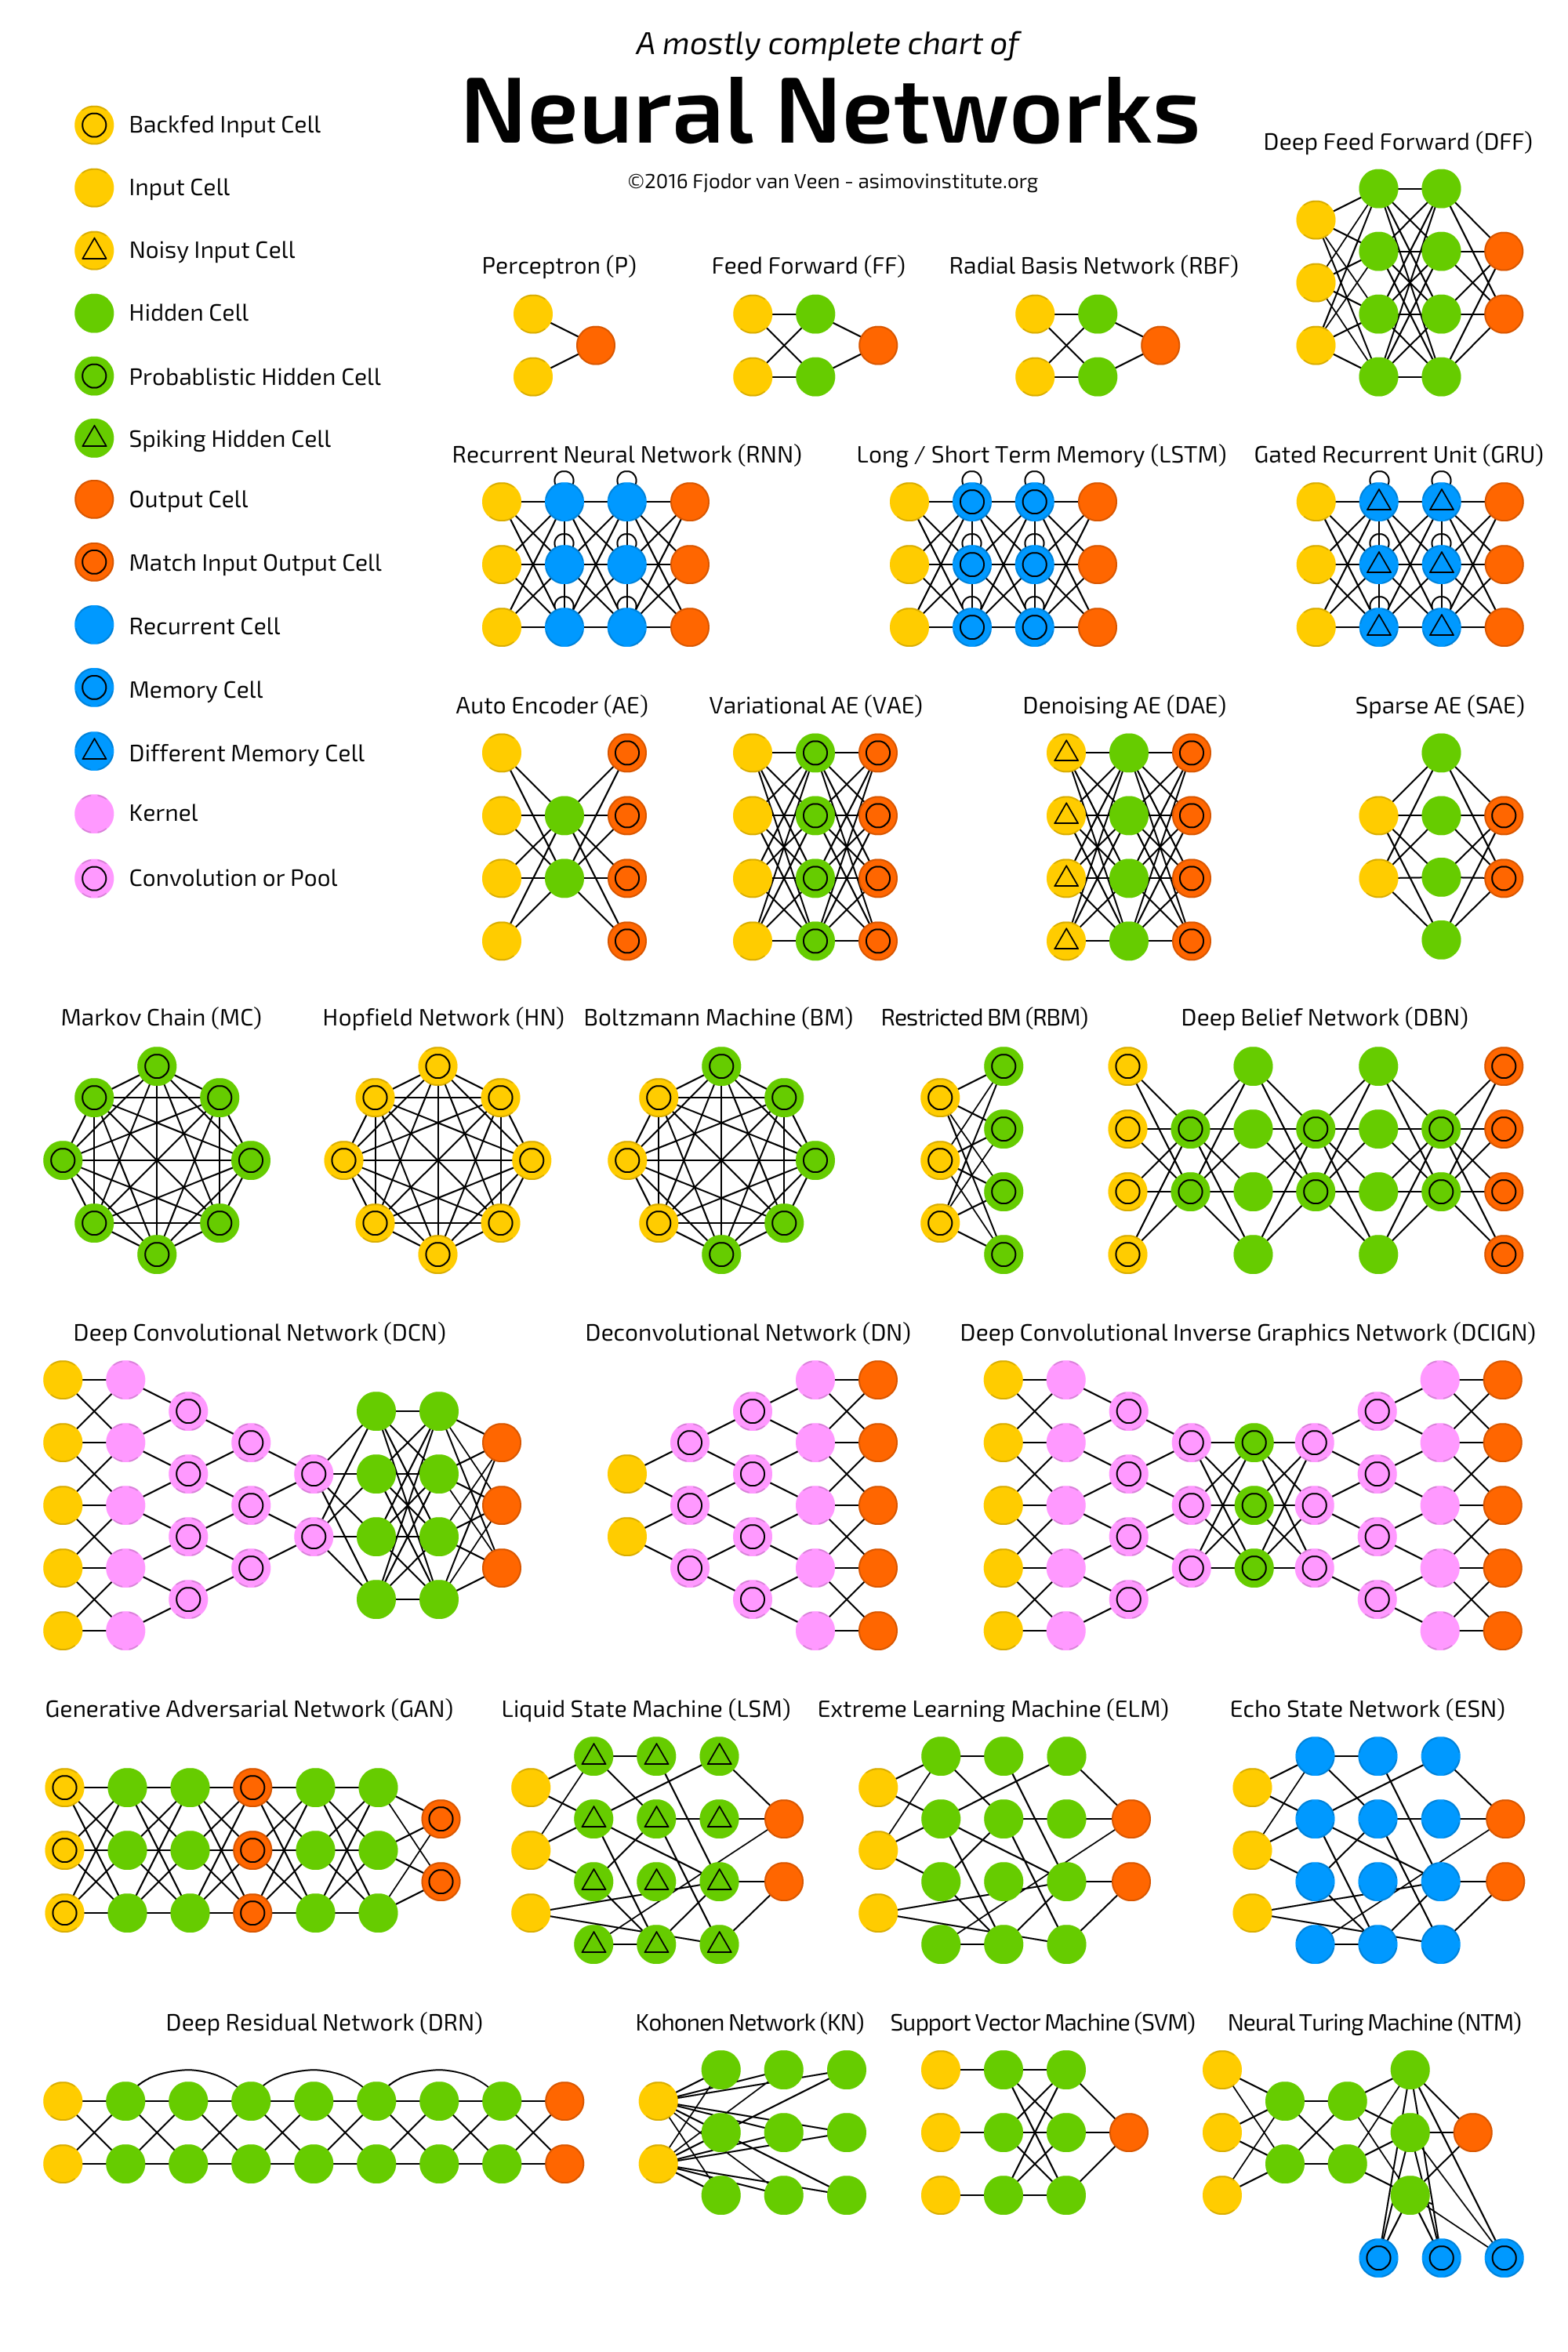

In [35]:
Image(filename = "data/images/neuralnetworks.png")

## Appendix

In [ ]:
# build computational graph
a = tf.placeholder(tf.int16, [None,1])
b = tf.placeholder(tf.int16, [None,1])
addition = tf.add(a, b)

# initialize variables
init = tf.global_variables_initializer()

# inputs
a_input = np.array([[1,2,3]]).T
b_input = np.array([[1,2,3]]).T
print("Input")
print(a_input)
print(b_input)

# create session and run the graph
with tf.Session() as sess:
    sess.run(init)
    print("Output")
    print (sess.run(addition, feed_dict={a: a_input, b: b_input}))

# close session
sess.close()